In [1]:
#WITH THIS CASE OF STUDY WE ARE TRYING TO CLEAN THIS DATA GATHER IN A CUSTOMER ANALYSIS CSV FILE FROM A CAR DEALERSHIP COMPANY.
#THE OBJECTIVE IS TO CLEAN IT, UNDERSTAND BETTER THE METRICS WITH EXPLORATORY ANALYSIS AND FINALLY CREATE A MODEL THAT COULD
#PREDICT IN THE FUTURE WHAT COULD BE THE TOTAL CLAIM AMOUNT OF A CUSTOMER

In [2]:
#02 - GETTING DATA: We start reading the file in which we are going to work.
import pandas as pd
import numpy as np

df = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv', index_col=[0])

In [3]:
#03.CLEANING / WRANGLING / EDA--------------------------------------------------------------------------------------------------

In [4]:
#03.2.We change header names(white spaces and lower case).
column_names = df.columns
cols = []
for colname in df.columns:
    cols.append(colname.lower().replace(' ', '_'))

df.columns = cols

In [5]:
#03.3.Dealing with NaN values: we drop the column 'vehicle_type' with too much NaN values and redundant information and
#we change the type of the column 'effective_to_date' to be read as date.

#df = df.drop(['vehicle_type'], axis=1) -> And we drop this column with too much NaN values and redundant information. 
df['effective_to_date'] = pd.to_datetime(df['effective_to_date'], errors='coerce')

In [6]:
#03.4.We fill NaN values in categorical columns with their mode.
df['state'] = df['state'].fillna('California')
df['response'] = df['response'].fillna('No')

In [7]:
#03.5.And the numerical with their median.
df['months_since_last_claim'] = df['months_since_last_claim'].fillna(df['months_since_last_claim'].median())
df['number_of_open_complaints'] = df['number_of_open_complaints'].fillna(df['number_of_open_complaints'].median())
df['vehicle_class'] = df['vehicle_class'].fillna(df['vehicle_class'].mode()[0])
df['vehicle_size'] = df['vehicle_size'].fillna(df['vehicle_size'].mode()[0])

In [10]:
#3.6.Exploration: we display plots in order to understand better the data we are dealing in a more visual way.

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

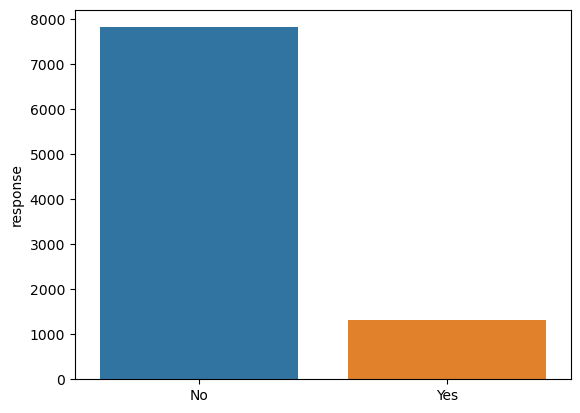

In [12]:
#Show a plot of the total number of responses.
sns.barplot(x=df.response.value_counts().index, y=df.response.value_counts())
plt.show()

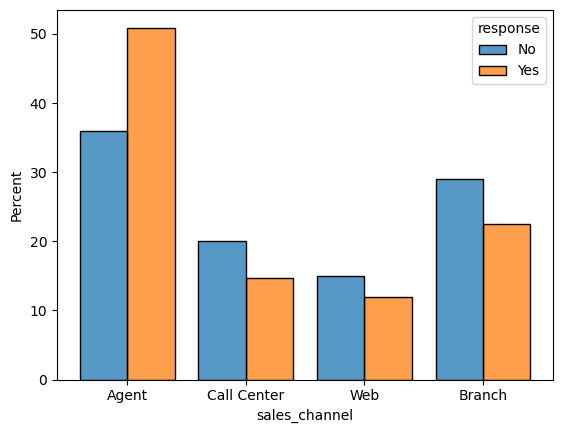

In [13]:
#Show a plot of the response rate by the sales channel.
sns.histplot(x = df['sales_channel'], hue=df['response'], multiple="dodge", shrink = 0.8, stat = 'percent', common_norm=False)
plt.show()

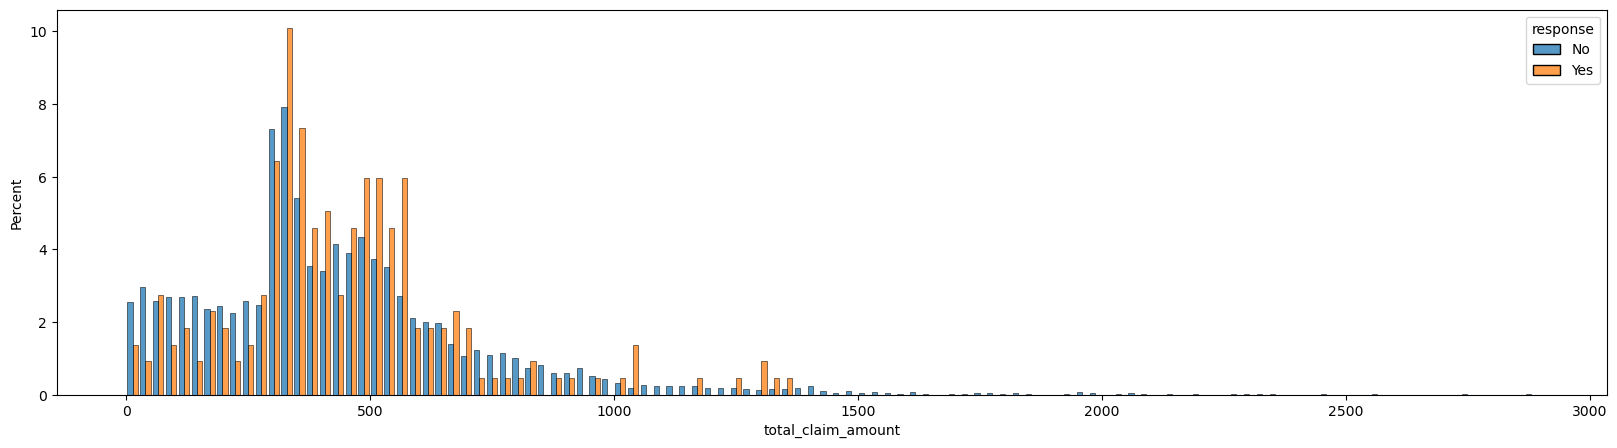

In [14]:
#Show a plot of the response rate by the total claim amount.
fig, ax = plt.subplots(figsize=(20,5))
sns.histplot(x = df['total_claim_amount'], hue=df['response'], multiple="dodge", shrink = 0.8, stat = 'percent', common_norm=False)
plt.show()

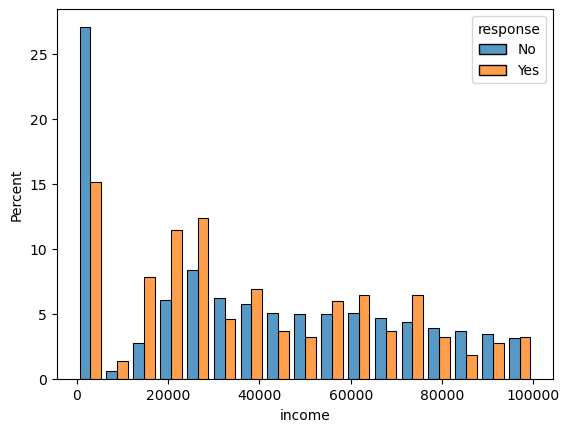

In [15]:
#Show a plot of the response rate by income.

sns.histplot(x = df['income'], hue=df['response'], multiple="dodge", shrink = 0.8, stat = 'percent', common_norm=False)
plt.show()

In [16]:
#4.PROCESSING DATA----------------------------------------------------------------------------------

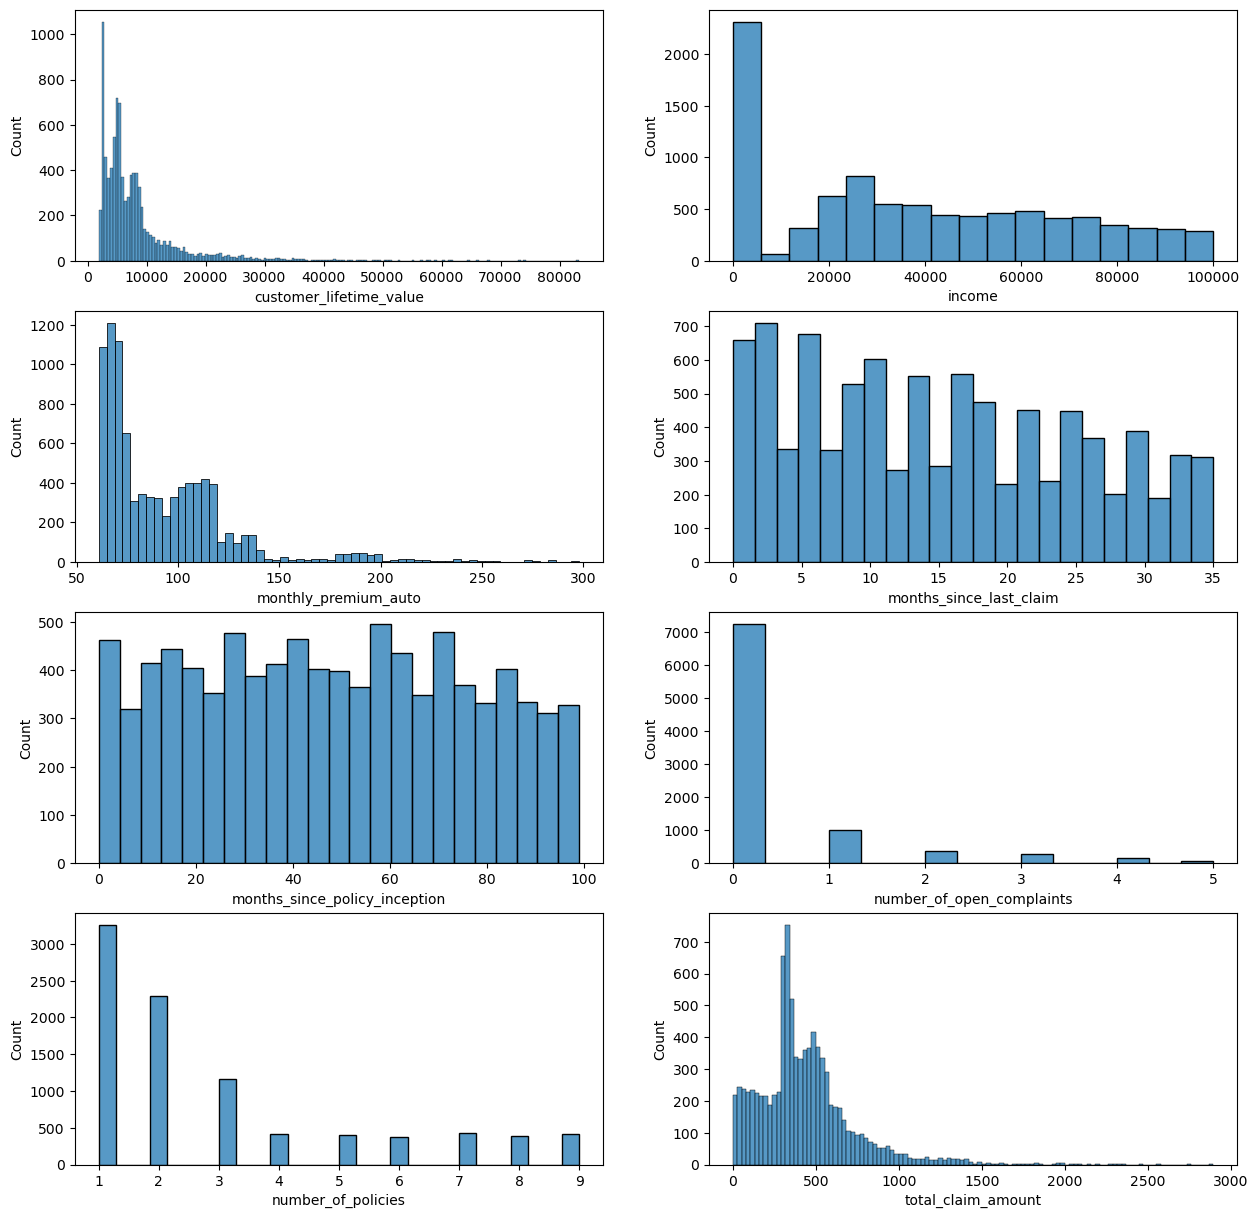

In [17]:
#4.1.We display the distribution of each variable in order to know if we have to deal with outliers. And we see that 
#none have a normal distribution
fig, ax = plt.subplots(4,2, figsize=(15,15))
sns.histplot(x='customer_lifetime_value', data=df, ax = ax[0][0]) #bins=50
sns.histplot(x='income', data=df, ax = ax[0][1])
sns.histplot(x='monthly_premium_auto', data=df, ax = ax[1][0])
sns.histplot(x='months_since_last_claim', data=df, ax = ax[1][1])
sns.histplot(x='months_since_policy_inception', data=df, ax = ax[2][0])
sns.histplot(x='number_of_open_complaints', data=df, ax = ax[2][1])
sns.histplot(x='number_of_policies', data=df, ax = ax[3][0])
sns.histplot(x='total_claim_amount', data=df, ax = ax[3][1])
plt.show()

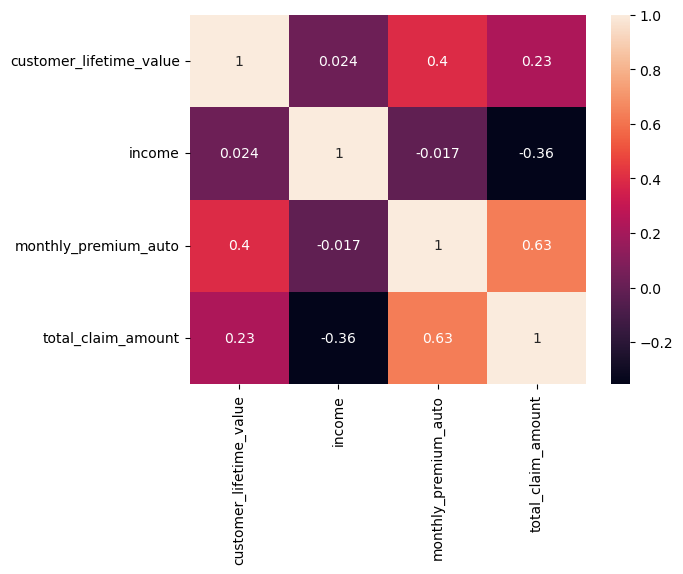

In [18]:
#Know we check the correlation matrix in order to see which are the most correlated columns to pick the variables that 
#we will use to predict total claim amount in our linear model. As well is useful to avoid multicollinearity. 
corr_matrix_filt = df[['customer_lifetime_value','income', 'monthly_premium_auto', 'total_claim_amount']].corr()
sns.heatmap(corr_matrix_filt, annot=True)
plt.show()

In [19]:
#we will not have to drop any variable because there are not 2 variables with a correlation bigger than 0.9

In [20]:
#4.4 We make the X-y split (we want to predict total_claim_amount). Our depending variable is a DataFrame 
#of the most related features, not just the most releated because we geta better linear correlation (0.52 > 0.4).
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
reduced_df = df[['customer_lifetime_value','income', 'monthly_premium_auto', 'total_claim_amount']]
y = reduced_df['total_claim_amount']
x = reduced_df.drop(['total_claim_amount'], axis=1)
lm = LinearRegression().fit (x,y)

In [22]:
#4.2.Normalization: knowing that all values are positive we apply PowerTransformer
from sklearn.preprocessing import PowerTransformer
transformer_def1 = PowerTransformer().fit(x) 
x_pt = transformer_def1.transform(x)
x_pt_df = pd.DataFrame(x_pt, columns=x.columns)

In [25]:
#And MinMaxScaler in order to be able to compare different features.
from sklearn.preprocessing import MinMaxScaler
transformer_def2 = MinMaxScaler().fit(x_pt_df)
x_ptms = transformer.transform(x_pt_df)
x_ptms_df  = pd.DataFrame(x_ptms,  columns=x_pt_df.columns)

In [26]:
#5.We train the model and apply it. Using a test set of 20% because we hava a huge sample.
x_train_def, x_test_def, y_train_def, y_test_def = train_test_split(x_ptms_df, y, test_size=0.2, random_state=42)

lm_def = LinearRegression().fit(x_train_def, y_train_def)
y_pred_train_def = lm_def.predict(x_train_def)
y_pred_test_def = lm_def.predict(x_test_def)

In [28]:
#6.Finally, we validate the performance of the model.
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(r2_score(y_test_def, y_pred_test_def)) #R2
print(mean_squared_error(y_test_def, y_pred_test_def)) #MSE
print(np.sqrt(mean_squared_error(y_test_def, y_pred_test_def))) #RMSE
print(mean_absolute_error(y_test_def, y_pred_test_def)) #MAE

0.3910966428496212
48414.539654487504
220.03304218795753
156.30179661848993


In [ ]:
#7.Reporting results: In the end, this linear model with the variables selected explains or can predict almost 40% of the future
#results of total claim amount. This is not a bad performance taking into account that most of the variables were not 
#too correlated with the variable we were trying to predict (total_claim_amount)

In [43]:
#Final bonus question corrected:
def df_cleaner_lm(df1):
    df2 = df1.copy()
    column_names = df2.columns
    cols = []
    for colname in df2.columns:
        cols.append(colname.lower().replace(' ', '_'))
    df2.columns = cols
    #df1 = df1.drop(['vehicle_type'], axis=1)
    df2['state'] = df2['state'].fillna('California')
    df2['response'] = df2['response'].fillna('No')
    df2['months_since_last_claim'] = df2['months_since_last_claim'].fillna(df2['months_since_last_claim'].median())
    df2['number_of_open_complaints'] = df2['number_of_open_complaints'].fillna(df2['number_of_open_complaints'].median())
    df2['vehicle_class'] = df2['vehicle_class'].fillna(df2['vehicle_class'].mode()[0])
    df2['vehicle_size'] = df2['vehicle_size'].fillna(df2['vehicle_size'].mode()[0])
    df2['effective_to_date'] = pd.to_datetime(df2['effective_to_date'], errors='coerce')
    reduced_df2 = df2[['customer_lifetime_value','income', 'monthly_premium_auto', 'total_claim_amount']]
    y_1 = reduced_df2['total_claim_amount']
    x_1 = reduced_df2.drop(['total_claim_amount'], axis=1)
    lm_1 = LinearRegression().fit (x_1,y_1)
    transformer_1 = MinMaxScaler().fit(x_1)
    x_normalized_1 = transformer.transform(x_1)
    X_norm_df1 = pd.DataFrame(x_normalized_1, columns=x_1.columns)
    x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(X_norm_df1, y_1, test_size=0.2, random_state=42)
    lm3_1 = LinearRegression().fit(x_train_1,y_train_1)
    y_pred_train_1 = lm3_1.predict(x_train_1)
    y_pred_test_1 = lm3_1.predict(x_test_1)
    r2 = r2_score(y_test_1, y_pred_test_1)
    df2_trained = pd.DataFrame(x_train_1, columns=x_train_1.columns)
    return df2_trained, 'To predict total claim amount the model used gives back an R2 score of: {}'.format(r2)

In [44]:
df_bonus = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv', index_col=[0])
df_trained, r2_msg = df_cleaner_lm(df_bonus)

In [45]:
print(df_trained)
type(df_trained)
#I don't know why it returns me a tuple when I have never change the DataFrame and I don't know how to solve it

      customer_lifetime_value    income  monthly_premium_auto
5123                 0.035258  0.511537              0.000000
7738                 0.011416  0.000000              0.075949
214                  0.012464  0.811124              0.054852
8580                 0.039793  0.722777              0.012658
7857                 0.008748  0.547474              0.021097
...                       ...       ...                   ...
5734                 0.066763  0.879737              0.000000
5191                 0.044223  0.225243              0.050633
5390                 0.087130  0.000000              0.286920
860                  0.156427  0.000000              0.329114
7270                 0.017827  0.781068              0.097046

[7307 rows x 3 columns]


pandas.core.frame.DataFrame